# 0.0 IMPORTS

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate

# 0.1 Loading Data

In [2]:
df_raw = pd.read_csv('Datasets/kc_house_data.csv', low_memory=False)

In [3]:
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 0.2 Summary Data

- id - Identificador de cada propriedade.
- date - Data em que a propriedade ficou disponível.
- price - O preço de cada imóvel, considerado como preço de compra.
- bedrooms - Número de quartos.
- bathrooms - O número de banheiros, o valor 0,5 indica um quarto com banheiro, mas sem chuveiro. O valor 0,75 ou 3/4 banheiro representa um banheiro que contém uma pia, um vaso sanitário e um chuveiro ou banheira.
- sqft_living - Pés quadrados do interior das casas.
- sqft_lot - Pés quadrados do terreno das casas.
- floors - Número de andares.
- waterfront - Uma variável fictícia para saber se a casa tinha vista para a orla ou não, '1' se a propriedade tem uma      orla, '0' se não.
- view - Vista, Um índice de 0 a 4 de quão boa era a visualização da propriedade.
- condition - Um índice de 1 a 5 sobre o estado das moradias, 1 indica propriedade degradada e 5 excelente.
- grade - Uma nota geral é dada à unidade habitacional com base no sistema de classificação de King County. O índice                     de 1 a 13, onde 1-3 fica aquém da construção e design do edifício, 7 tem um nível médio de construção e                         design e 11-13 tem um nível de construção e design de alta qualidade.
- sqft_above - Os pés quadrados do espaço habitacional interior acima do nível do solo.
- sqft_basement - Os pés quadrados do espaço habitacional interior abaixo do nível do solo.
- yr_built - Ano de construção da propriedade.
- yr_renovated - Representa o ano em que o imóvel foi reformado. Considera o número ‘0’ para descrever as propriedades nunca renovadas.
- zipcode - Um código de cinco dígitos para indicar a área onde se encontra a propriedade.
- lat - Latitude.
- long - Longitude.
- sqft_living15 - O tamanho médio em pés quadrados do espaço interno de habitação para as 15 casas mais próximas.
- sqft_lot15 - Tamanho médio dos terrenos em metros quadrados para as 15 casas mais próximas.

# 1.0 DESCRIÇÃO DOS DADOS

In [4]:
df1 = df_raw.copy()

## 1.1 Data Dimensions

In [6]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 21613
Number of Cols: 21


## 1.2 Data Types

In [7]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
#date to datetime

df1['date'] =pd.to_datetime(df1['date'])

In [9]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.4 Check NA

In [12]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 2.0 Hypothesis Validation

In [13]:
df2 = df1.copy()

## 2.1 Hypothesis List

- H1: Imóveis que possuem vista para água são 20% mais caros em média.
- H2: Imóveis com data de construção menor que 1955 são 50% mais baratos na média.
- H3: Imóveis sem porão possuem área total 40% maior que a dos imóveis com porão.
- H4: O crescimento do preço dos imóveis YoY é de 10%.
- H5: Imóveis com 3 banheiros tem um crescimento de MoM de 15%.
- H6: Imóveis com 2 quartos são 20% mais caros que imóveis com menos quartos.
- H7: Imóveis construídos na decáda de 90 são 20% mais baratos que imóveis da década de 2000.
- H8: Imóveis com mais de 1 andar são 20% mais caros que imóveis com apenas 1 andar.
- H9: Imóveis que foram reformados depois de 2005 são 30% mais caros que os que foram reformados antes de 2005.
- H10: Imóveis que tem 2 quartos são no mínimo 50% mais caros que imóveis de apenas 1 quarto.

## 2.2 Hypothesis analysis

### H1: Imóveis que possuem vista para água são 20% mais caros em média.
**Falsa: Imóveis que possuem vista para água são 3.13 vezes mais caros, em média.**

Imóveis que possuem vista para água são, em média, 3.13 vezes mais caros que os que não possuem.


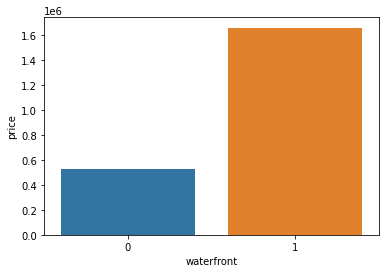

In [184]:
aux = df2[['waterfront','price']].groupby('waterfront').mean().reset_index()
sns.barplot(x='waterfront',y='price',data=aux);
print('Imóveis que possuem vista para água são, em média, {} vezes mais caros que os que não possuem.'.format(round(aux.loc[1,'price']/aux.loc[0,'price'],2)))

In [179]:
aux_2 = df2[['waterfront','price','zipcode']].groupby(['waterfront','zipcode']).mean().reset_index()

<AxesSubplot:xlabel='zipcode'>

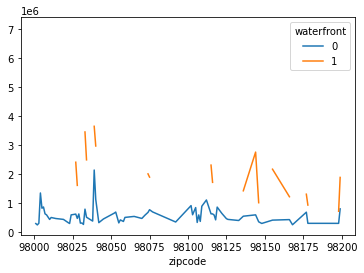

In [180]:
#Confirming that houses with waterfront are always more expensive
aux_2.pivot( index='zipcode', columns='waterfront', values='price' ).plot()

### H2: Imóveis com data de construção menor que 1955 são 50% mais baratos na média.
**Falsa: Imóveis construídos antes e após 1955 apresentam, em média, valores muito próximos.**

Imóveis contruídos antes de 1955 têm 0.99 vez o preço médio de imóveis construídos após isso.


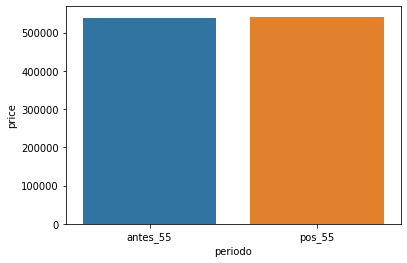

In [171]:
aux = df2.loc[df2['yr_built']<1955]
aux_price = aux['price'].mean()
aux_1 = df2.loc[df2['yr_built']>=1955]
aux_1_price = aux_1['price'].mean()
df_aux = pd.DataFrame({'antes_55':aux_price,'pos_55':aux_1_price},index=[0]).T.reset_index().rename(columns={'index':'periodo',0:'price'})
sns.barplot(x='periodo',y='price',data=df_aux)
print('Imóveis contruídos antes de 1955 têm {} vez o preço médio de imóveis construídos após isso.'.format(round(aux_price/aux_1_price,2)))

### H3: Imóveis sem porão possuem área total 40% maior que a dos imóveis com porão.
**Falsa: Imóveis sem porão possuem área total 23% maior que a dos imóveis com porão**

Imóveis sem porão possuem área total 22.56% maior que imóveis com porão


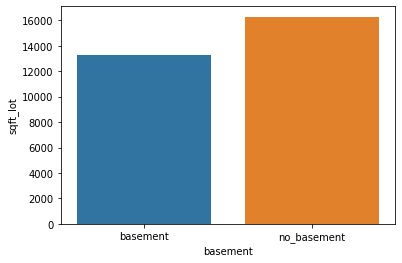

In [156]:
df2_aux = df2.copy()
df2_aux['basement'] = df2_aux['sqft_basement'].apply(lambda x: 'no_basement' if x==0 else 'basement')
df2_aux_plot = df2_aux[['basement','sqft_lot']].groupby('basement').mean().reset_index()
sns.barplot(x='basement',y='sqft_lot',data=df2_aux_plot)
print('Imóveis sem porão possuem área total {}% maior que imóveis com porão'.format(round((((df2_aux_plot.loc[1,'sqft_lot']/df2_aux_plot.loc[0,'sqft_lot'])-1)*100),2)))

### H4: Imóveis com 2 quartos são 20% mais caros que imóveis com menos quartos.
**Verdadeira: Imóveis com 2 quartão são, em média, 24.16% mais caros que imóveis com menos quartos**

Imóveis com dois quartos são 24.16% mais caros que imóveis com menos quartos.


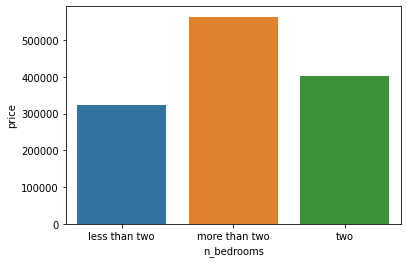

In [155]:
df2_aux = df2.copy()
df2_aux['n_bedrooms'] = df2_aux['bedrooms'].apply(lambda x: 'two' if x==2 else 'less than two' if x<2 else 'more than two')
aux = df2_aux[['n_bedrooms','price']].groupby('n_bedrooms').mean().reset_index()
sns.barplot(x='n_bedrooms',y='price',data=aux);
print('Imóveis com dois quartos são {}% mais caros que imóveis com menos quartos.'.format(round((aux.loc[2,'price']/aux.loc[0,'price']-1)*100,2)))

### H5: Imóveis construídos na decáda de 90 são 20% mais baratos que imóveis da década de 2000.
**Falsa: Imóveis contruídos na década de 1990 são 16.23% mais baratos que os contruídos na década de 2000.**

Imóveis contruídos na década de 1990 são 16.23% mais baratos que os contruídos na década de 2000.


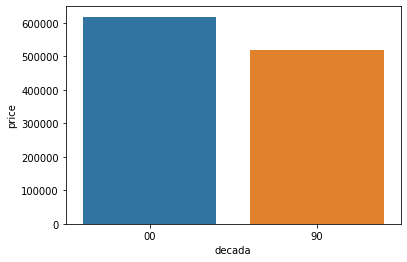

In [154]:
df2_aux = df2.copy()
df2_aux['decada'] = df2_aux['yr_built'].apply(lambda x: '90' if x<=1999 else '00' if x>=2000 else '-')
aux = df2_aux[['decada','price']].groupby('decada').mean().reset_index()
sns.barplot(x='decada',y='price',data=aux);
print('Imóveis contruídos na década de 1990 são {}% mais baratos que os contruídos na década de 2000.'.format(round((1-aux.loc[1,'price']/aux.loc[0,'price'])*100,2)))

### H6: Imóveis com mais de 1 andar são 20% mais caros que imóveis com apenas 1 andar.
**Falsa: Imóveis com mais de 1 andar são 43% mais caro que imóveis com apenas 1 andar.**

Imóveis com mais de 1 andas são 43.77% mais caros que imóvies de apenas 1 andar


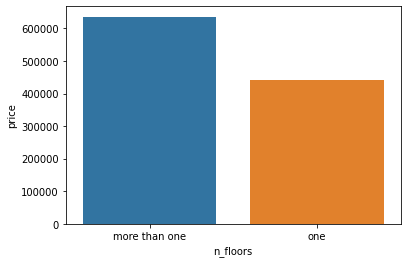

In [153]:
df2_aux = df2.copy()
df2_aux['n_floors'] = df2_aux['floors'].apply(lambda x: 'more than one' if x>1 else 'one' if x==1 else '-')
aux = df2_aux[['n_floors','price']].groupby('n_floors').mean().reset_index()
sns.barplot(x='n_floors',y='price',data=aux);
print('Imóveis com mais de 1 andas são {}% mais caros que imóvies de apenas 1 andar'.format(round((aux.loc[0,'price']/aux.loc[1,'price']-1) *100,2)))

### H7: Imóveis que foram reformados depois de 2005 são aproximadamente 30% mais caros que os que foram reformados antes de 2005.
**Verdadeiro: Imóveis que foram reformados depois de 2005 são cerca de 28.5% mais caros que os foram antes.**

Imóveis que foram reformados depois 2005 são 28.47% mais caros que os que foram reformados antes.


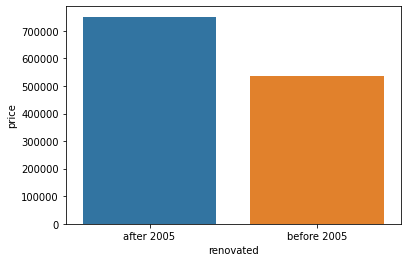

In [163]:
df2_aux = df2.copy()
df2_aux['renovated'] = df2_aux['yr_renovated'].apply(lambda x: 'before 2005' if x<=2005 else 'after 2005')
aux = df2_aux[['renovated','price']].groupby('renovated').mean().reset_index()
sns.barplot(x='renovated',y='price',data=aux);
print('Imóveis que foram reformados depois 2005 são {}% mais caros que os que foram reformados antes.'.format(round((1-(aux.loc[1,'price']/aux.loc[0,'price']))*100,2)))

### H8: Imóveis que tem 2 quartos são no mínimo 50% mais caros que imóveis de apenas 1 quarto.
**Falsa: Imóveis com 2 quartos são, em média, 26.5% mais caros que imóveis de 1 quarto.**

Imóveis com 2 quartão são 26.36% mais caros que imóveis de 1 quarto


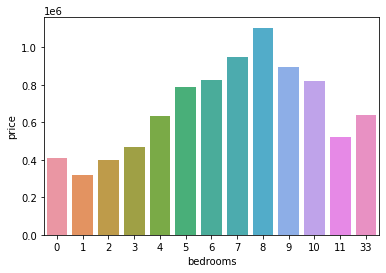

In [164]:
aux = df2[['bedrooms','price']].groupby('bedrooms').mean().reset_index()
sns.barplot(x='bedrooms',y='price',data=aux);
print('Imóveis com 2 quartão são {}% mais caros que imóveis de 1 quarto'.format(round((aux.loc[2,'price']/aux.loc[1,'price'] - 1)*100,2)))

## Hypotesis Table

In [187]:
table = {'Hypotesis': ['H1','H2','H3','H4','H5','H6','H7','H8'],'Conclusion':['False','False','False','True','False','False','True','False'],'Relevance':['High','Low','Low','Low','Low','High','High','Low']}

print(tabulate(table, headers=['Hypotesis','Conclusion','Relevance'], tablefmt="fancy_grid"))

╒═════════════╤══════════════╤═════════════╕
│ Hypotesis   │ Conclusion   │ Relevance   │
╞═════════════╪══════════════╪═════════════╡
│ H1          │ False        │ High        │
├─────────────┼──────────────┼─────────────┤
│ H2          │ False        │ Low         │
├─────────────┼──────────────┼─────────────┤
│ H3          │ False        │ Low         │
├─────────────┼──────────────┼─────────────┤
│ H4          │ True         │ Low         │
├─────────────┼──────────────┼─────────────┤
│ H5          │ False        │ Low         │
├─────────────┼──────────────┼─────────────┤
│ H6          │ False        │ High        │
├─────────────┼──────────────┼─────────────┤
│ H7          │ True         │ High        │
├─────────────┼──────────────┼─────────────┤
│ H8          │ False        │ Low         │
╘═════════════╧══════════════╧═════════════╛
